<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/antonio_demarchi_PB_TP2_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


colunas em True.csv: ['title', 'text', 'subject', 'date']
colunas em Fake.csv: ['title', 'text', 'subject', 'date']
Valores nulos nO text: 0

 classificacao:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1861
           1       0.98      0.99      0.98      1919

    accuracy                           0.98      3780
   macro avg       0.98      0.98      0.98      3780
weighted avg       0.98      0.98      0.98      3780



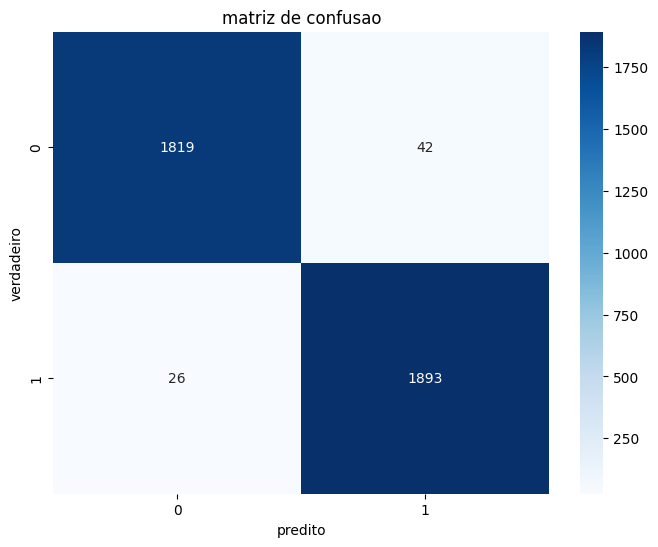

colunas True.csv: ['U.S. military to accept transgender recruits on Monday: Pentagon', 'WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful 

In [3]:
#1-
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#baixar itens do nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

#funcao de preprocessamento de texto
def preprocessamento_texto(text):
    """Pré-processa o texto para remover ruídos e padronizar."""
    if not isinstance(text, str):  #texto eh string?
        return ""
    #converter minusculas
    text = text.lower()
    #remover pontuacoes e numeros
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    #tokenizacao
    tokens = word_tokenize(text)
    #remover stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    #lematizacao
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

#carregar os datasets sem cabecalho e atribuir nomes de colunas
verdadeiro_dataset = 'https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/True.csv'
fake_dataset = 'https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/Fake.csv'

try:
    df_true = pd.read_csv(verdadeiro_dataset, header=None, names=['title', 'text', 'subject', 'date'])
    df_fake = pd.read_csv(fake_dataset, header=None, names=['title', 'text', 'subject', 'date'])
except Exception as e:
    print(f"erro ao carregar os datasets: {e}")
    raise

#verificar colunas
print("colunas em True.csv:", df_true.columns.tolist())
print("colunas em Fake.csv:", df_fake.columns.tolist())

#adicionar coluna target
df_true['target'] = 1  #verdadeiro
df_fake['target'] = 0  #falso

#combinar os datasets
df = pd.concat([df_true, df_fake], ignore_index=True)

#verificar valores nulos na coluna text
print("Valores nulos nO text:", df['text'].isnull().sum())

#remover ou substituir valores nulos
df['text'] = df['text'].fillna('')  # substituir NAN por string vazia

#aplicar pre-processamento na coluna text
df['cleaned_text'] = df['text'].apply(preprocessamento_texto)

#calcular tf-idf
tfidf_trigram_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = tfidf_trigram_vectorizer.fit_transform(df['cleaned_text'])
y = df['target']

#dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#treinar modelo de regressao logistica
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#previsoes
y_pred = model.predict(X_test)

#avaliacao do modelo
print("\n classificacao:")
print(classification_report(y_test, y_pred))

#matriz de confusao
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('matriz de confusao')
plt.xlabel('predito')
plt.ylabel('verdadeiro')
plt.show()

df_true = pd.read_csv(verdadeiro_dataset)
df_fake = pd.read_csv(fake_dataset)

#exibir colunas
print("colunas True.csv:", df_true.columns.tolist())
print("colunas Fake.csv:", df_fake.columns.tolist())



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Colunas em True.csv: ['title', 'text', 'subject', 'date']
Colunas em Fake.csv: ['title', 'text', 'subject', 'date']
Valores nulos em 'text': 0
Distribuição de classes: target
0    0.501693
1    0.498307
Name: proportion, dtype: float64


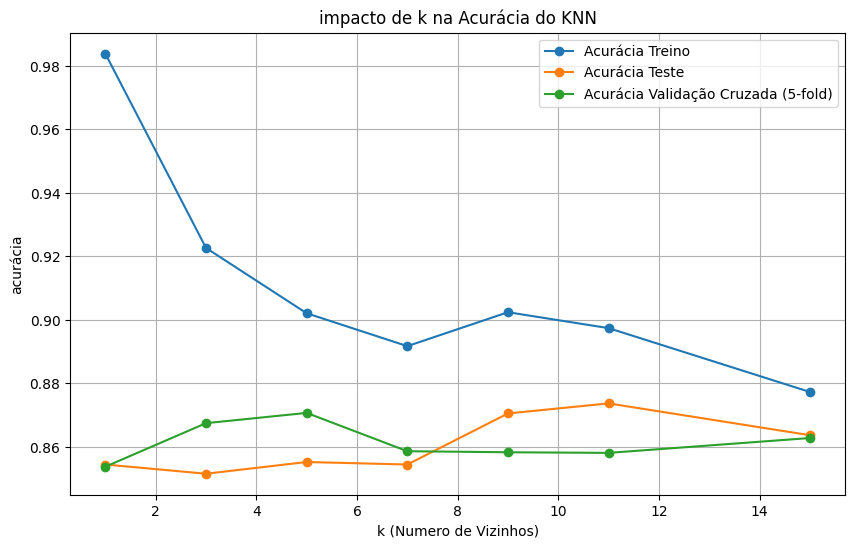

Melhor k: 5

 relatorio de classificacao:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1906
           1       0.81      0.93      0.86      1887

    accuracy                           0.86      3793
   macro avg       0.86      0.86      0.85      3793
weighted avg       0.86      0.86      0.85      3793



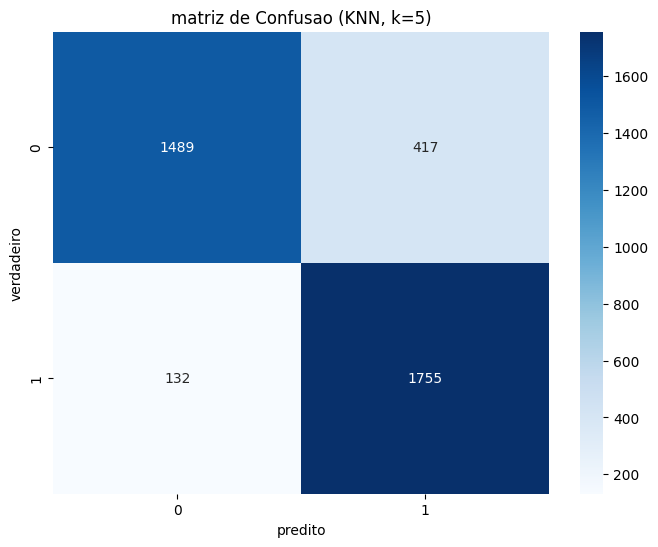

In [4]:
#2
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocessamento_texto(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

true_url = 'https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/True.csv'
fake_url = 'https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/Fake.csv'

try:
    df_true = pd.read_csv(true_url, header=None, names=['title', 'text', 'subject', 'date'])
    df_fake = pd.read_csv(fake_url, header=None, names=['title', 'text', 'subject', 'date'])
except Exception as e:
    print(f"erro ao carregar datasets: {e}")
    raise

print("colunas True.csv:", df_true.columns.tolist())
print("colunas Fake.csv:", df_fake.columns.tolist())

df_true['target'] = 1
df_fake['target'] = 0

df = pd.concat([df_true, df_fake], ignore_index=True)

print("valores null no text:", df['text'].isnull().sum())
df['text'] = df['text'].fillna('')
print("distribuicao classes:", df['target'].value_counts(normalize=True))
df['cleaned_text'] = df['text'].apply(preprocessamento_texto)

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['target']

# melhorar o codigo usando o SMOTE para balanceamento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#explorar valores de k
k_values = [1, 3, 5, 7, 9, 11, 15]
train_scores = []
test_scores = []
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    cv_score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_scores.append(cv_score)

#plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Acuracia Treino', marker='o')
plt.plot(k_values, test_scores, label='Acuracia Teste', marker='o')
plt.plot(k_values, cv_scores, label='Acuracia Validacao Cruzada (5-fold)', marker='o')
plt.xlabel('k (Numero de Vizinhos)')
plt.ylabel('acuracia')
plt.title('impacto de k na Acurácia do KNN')
plt.legend()
plt.grid(True)
plt.show()

#treinar modelo com melhor k
best_k = k_values[np.argmax(cv_scores)]
print(f"Melhor k: {best_k}")
knn = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')
knn.fit(X_train, y_train)

#previsoes
y_pred = knn.predict(X_test)

#avaliacao
print("\n relatorio de classificacao:")
print(classification_report(y_test, y_pred))

#matriz de confusao
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('matriz de Confusao (KNN, k={})'.format(best_k))
plt.xlabel('predito')
plt.ylabel('verdadeiro')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


colunas True.csv: ['title', 'text', 'subject', 'date']
colunas Fake.csv: ['title', 'text', 'subject', 'date']
valores null no text: 0
distribuicao classes: target
0    0.501693
1    0.498307
Name: proportion, dtype: float64
variacao explicada pelo SVD: 0.2419


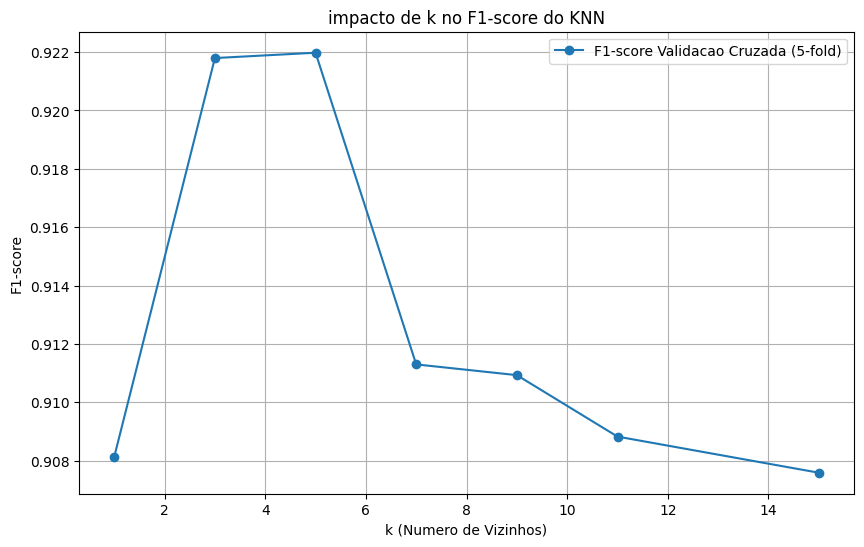

Melhor k: 5
Melhor peso: distance
Melhor F1-score (validacao cruzada): 0.9256

 relatorio de classificacao:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1906
           1       0.88      0.94      0.91      1887

    accuracy                           0.91      3793
   macro avg       0.91      0.91      0.91      3793
weighted avg       0.91      0.91      0.91      3793



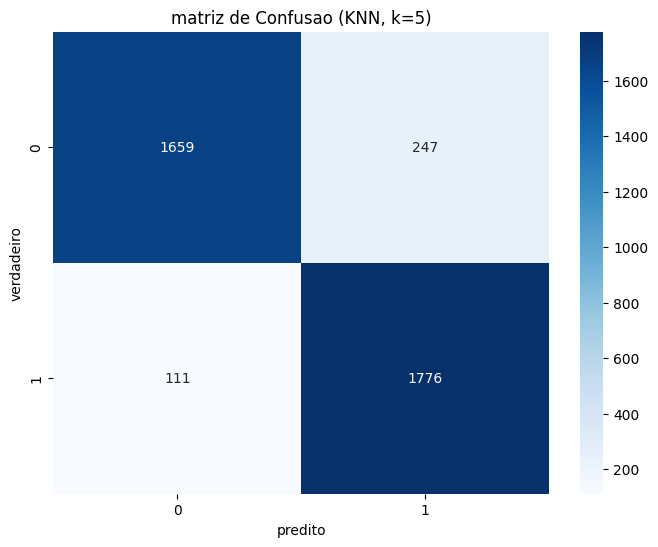

F1-score medio (validacao cruzada): 0.9256
Acuracia media (validacao cruzada): 0.9242


In [7]:
#3
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocessamento_texto(text):
    if not isinstance(text, str):  # texto eh string?
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

true_url = 'https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/True.csv'
fake_url = 'https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/Fake.csv'

try:
    df_true = pd.read_csv(true_url, header=None, names=['title', 'text', 'subject', 'date'])
    df_fake = pd.read_csv(fake_url, header=None, names=['title', 'text', 'subject', 'date'])
except Exception as e:
    print(f"erro ao carregar datasets: {e}")
    raise

print("colunas True.csv:", df_true.columns.tolist())
print("colunas Fake.csv:", df_fake.columns.tolist())

df_true['target'] = 1
df_fake['target'] = 0

df = pd.concat([df_true, df_fake], ignore_index=True)

print("valores null no text:", df['text'].isnull().sum())
df['text'] = df['text'].fillna('')

print("distribuicao classes:", df['target'].value_counts(normalize=True))

df['cleaned_text'] = df['text'].apply(preprocessamento_texto)

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['target']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#reduzir dimensionalidade com TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
X_resampled = svd.fit_transform(X_resampled)
print(f"variacao explicada pelo SVD: {np.sum(svd.explained_variance_ratio_):.4f}")

#dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#explorar valores de k com GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['cosine']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

#plotar resultados
results = pd.DataFrame(grid_search.cv_results_)
k_values = param_grid['n_neighbors']
mean_scores = [results[results['param_n_neighbors'] == k]['mean_test_score'].mean() for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, label='F1-score Validacao Cruzada (5-fold)', marker='o')
plt.xlabel('k (Numero de Vizinhos)')
plt.ylabel('F1-score')
plt.title('impacto de k no F1-score do KNN')
plt.legend()
plt.grid(True)
plt.show()

best_k = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']
print(f"Melhor k: {best_k}")
print(f"Melhor peso: {best_weights}")
print(f"Melhor F1-score (validacao cruzada): {grid_search.best_score_:.4f}")

knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights, metric='cosine')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

################################ avaliacao ###################################
print("\n relatorio de classificacao:")
print(classification_report(y_test, y_pred))

#matriz de confusao
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('matriz de confusao (KNN, k={})'.format(best_k))
plt.xlabel('predito')
plt.ylabel('verdadeiro')
plt.show()

#analise da validacao cruzada
cv_f1 = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1').mean()
cv_accuracy = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"F1-score medio (validacao cruzada): {cv_f1:.4f}")
print(f"acuracia media (validacao cruzada): {cv_accuracy:.4f}")





sensibilidade [recall classe positiva]: 0.9412
especificidade: 0.8704


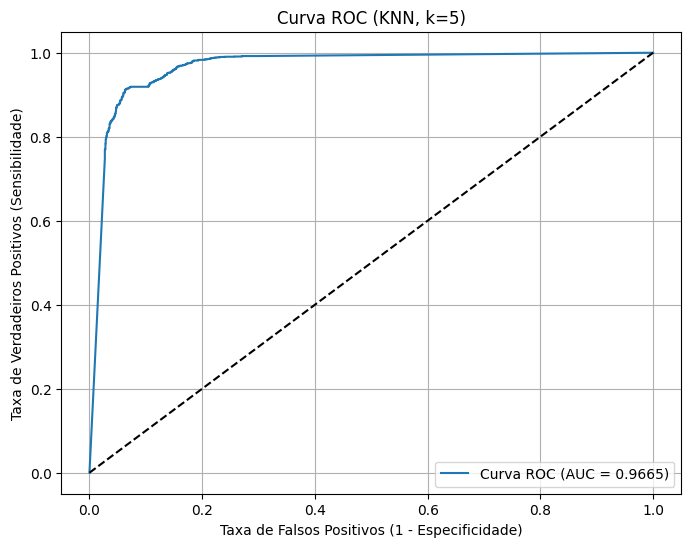

In [9]:
#4

#SEnsibilidade a partir da matriz de confusao
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensibilidade = TP / (TP + FN) if (TP + FN) > 0 else 0
especificidade = TN / (TN + FP) if (TN + FP) > 0 else 0

print(f"sensibilidade [recall classe positiva]: {sensibilidade:.4f}")
print(f"especificidade: {especificidade:.4f}")

#calcular e plotar a Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

#obter probabilidades para a classe positiva
y_prob = knn.predict_proba(X_test)[:, 1]

#calcular curva ROC e AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

#plotar a ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC (KNN, k={})'.format(best_k))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


